In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
import os
import pandas as pd

run_paths = [
   #"../mlruns/117967985259146291/0320dd8c949d4fed92b098c9bc2ea4b4/metrics/", # SMALL SYN
    #"../mlruns/117967985259146291/fe82d5ea6ef14bfcaa382bac08eca665/metrics/", # MEDIUM SYN
    "../mlruns/117967985259146291/8d735c8048dc4233b52a53f90d4de39c/metrics/", # LARGE SYN
    
    #"../mlruns/117967985259146291/6111072cb4fc420099d4cbbfff0e0a28/metrics/", # SMALL SYNFLEUR 1.0h
    #"../mlruns/117967985259146291/f21f880299db4b3987ddf60a70f965cd/metrics/", # MEDIUM SYNFLEUR 1.0h
    #"../mlruns/117967985259146291/eaad4c60cd734ecd84e43b94f4250fd9/metrics/", # LARGE SYNFLEUR
    
    
    #"../mlruns/117967985259146291/1d6aa256120f478aa454490c7bc9e1d4/metrics/", # SMALL SYNCV
    #"../mlruns/117967985259146291/b5fbbe1ad2f64e8d866592754a2f181b/metrics/", # MEDIUM SYNCV    
    #"../mlruns/117967985259146291/957f69d28f5c4835b4084932b946c948/metrics/", # LARGE SYNCV 

]

df_list = []  # List to store DataFrames from each run

for run_path in run_paths:
    data = {"epoch": []}  # Dictionary to store extracted data
    
    for file_name, col_name in [("loss", "loss"), ("eval_loss", "eval_loss")]:
        file_path = os.path.join(run_path, file_name)

        if os.path.exists(file_path):
            with open(file_path, "r") as file:
                lines = file.readlines()

                # Extract epoch and loss values
                epochs, losses, eval_losses = [], []
                for line in lines:
                    parts = line.strip().split()  # Split by whitespace
                    if len(parts) == 3:
                        _, loss, epoch = parts
                        epochs.append(int(epoch))
                        losses.append(float(loss))
                
                if col_name == "loss":
                    data["loss"] = losses
                elif col_name == "eval_loss":
                    data["eval_loss"] = losses
                data["epoch"] = epochs

        else:
            print(f"File {file_name} not found in {run_path}")

    # Convert dictionary to DataFrame
    df_run = pd.DataFrame(data)

    # Add a column to indicate which run this data is from
    df_run["run"] = os.path.basename(os.path.dirname(run_path))  # Use run ID as identifier

    # Append the DataFrame to the list
    df_list.append(df_run)

# Concatenate all runs into a single DataFrame
df = pd.concat(df_list, ignore_index=True)

# ✅ Sort by epoch
df = df.sort_values(by="epoch").reset_index(drop=True)

print(df)



    

     epoch    loss      run
0       25  0.6871  metrics
1       50  0.5164  metrics
2       75  0.5625  metrics
3      100  0.4393  metrics
4      125  0.3900  metrics
..     ...     ...      ...
297   7450  0.0700  metrics
298   7475  0.0485  metrics
299   7500  0.0479  metrics
300   7525  0.0510  metrics
301   7550  0.0496  metrics

[302 rows x 3 columns]


KeyError: 'eval_loss'

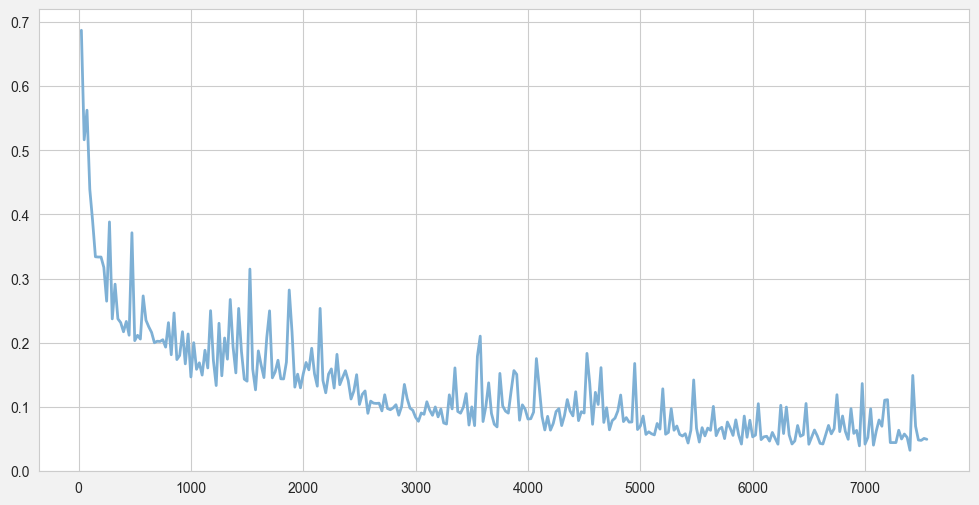

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df['eval_loss'] = 

# Set Seaborn style with a beige background
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6), facecolor="#f2f2f2")  # Soft beige background

# Choose a beautiful font# Use a classic serif font
plt.rcParams["font.size"] = 10       # Slightly larger font

plt.plot(df["epoch"], df["loss"], label="Training Loss", 
         color="#7eb0d5", linewidth=2, alpha=1.0)
plt.plot(df["epoch"], df["eval_loss"], label="Validation Loss", 
         color="#8bd3c7", linewidth=2,  alpha=1.0)

plt.xlabel("Steps", fontsize=14)  # Increased label padding
plt.ylabel("Loss", fontsize=14)  # Increased label padding
plt.title("Training vs Validation Loss (Whisper-medium-Syn+CommonVoice)", fontsize=18)  # Increased title padding

plt.grid(color="gray", linestyle="dotted", linewidth=0.5, alpha=0.6)

plt.legend(fontsize=14, loc="upper right", frameon=True, shadow=True, facecolor="white")

plt.show()
